<a href="https://colab.research.google.com/github/Eddeddedd/2022pythonchickpublic/blob/main/221120_%EC%B5%9C%EC%A2%85%EA%B3%BC%EC%A0%9C(%ED%8C%8C%EC%9D%B4%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 부산의 최근 24시간 미세먼지, 초미세먼지 현황 그래프로 나타내기

1. 부산의 최근 24시간 미세먼지, 초미세먼지 현황 데이터를 다운로드 받습니다.
 - 처음에는 미세먼지만 했는데, 생각해보니 초미세먼지도 같이 나타낼 수 있었습니다.
(http://heis.busan.go.kr/environmental/air002_2.aspx?itemcode=PM-10&itemselect=1&itemname=%eb%af%b8%ec%84%b8%eb%a8%bc%ec%a7%80)

2. 엑셀 파일에서 필요한 부분만 추출하여 csv 파일로 변경하여 업로드합니다.
3. 측정소 명을 input으로 받아 자신이 검색하고 싶은 측정소를 검색할 수 있도록 합니다.
4. 리스트, 그래프 함수를 이용하여 현황을 그래프로 나타냅니다.

In [2]:
# 한글폰트설치
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [13]:
import csv
data = csv.reader(open('busan.csv'))

for row in data :
  print(row)

['\ufeff지역', '20일 17시', '16시', '15시', '14시', '13시', '12시', '11시', '10시', '09시', '08시', '07시', '06시', '05시', '04시', '03시', '02시', '01시', '19일 24시', '23시', '22시', '21시', '20시', '19시', '18시']
['광복', '16', '26', '20', '22', '24', '22', '22', '23', '22', '17', '16', '18', '21', '22', '26', '23', '28', '26', '32', '29', '30', '33', '30', '31']
['장림', '32', '28', '27', '21', '20', '25', '37', '33', '29', '25', '23', '26', '24', '23', '25', '28', '28', '27', '31', '28', '24', '30', '27', '33']
['학장', '32', '33', '27', '22', '21', '27', '36', '36', '27', '32', '34', '26', '26', '25', '27', '27', '27', '23', '25', '32', '25', '32', '33', '31']
['덕천', '29', '24', '26', '24', '26', '30', '26', '29', '30', '27', '28', '29', '23', '27', '28', '29', '30', '29', '32', '37', '40', '31', '27', '30']
['연산', '26', '22', '23', '25', '22', '22', '20', '21', '16', '22', '22', '22', '24', '22', '23', '29', '26', '26', '30', '30', '34', '33', '27', '30']
['대연', '16', '26', '23', '22', '26', '27', '25', '25', '

In [14]:
import csv
data = csv.reader(open('busan.csv'))
x=[]

for row in data :
  if '대연' in row[0] :
    for i in range(1, 25) :
      x.append(int(row[i]))
    break
print(x)

[16, 26, 23, 22, 26, 27, 25, 25, 22, 21, 27, 27, 27, 26, 26, 22, 25, 26, 28, 31, 37, 30, 23, 23]


미세먼지 현황

부산의 24시간 미세먼지 현황입니다.
측정소 명칭은 광복, 장림, 학장, 덕천, 연산, 대연, 청룡, 전포, 태종, 기장, 대저, 부곡, 광안, 명장, 녹산, 용수, 좌동, 수정, 대신, 덕포, 당리, 개금, 청학, 재송, 화명, 온천, 초량, 명지, 회동, 용호, 삼락 입니다.
알아보고 싶은 측정소의 명칭을 입력해주세요 : 광안


<function matplotlib.pyplot.show(*args, **kw)>

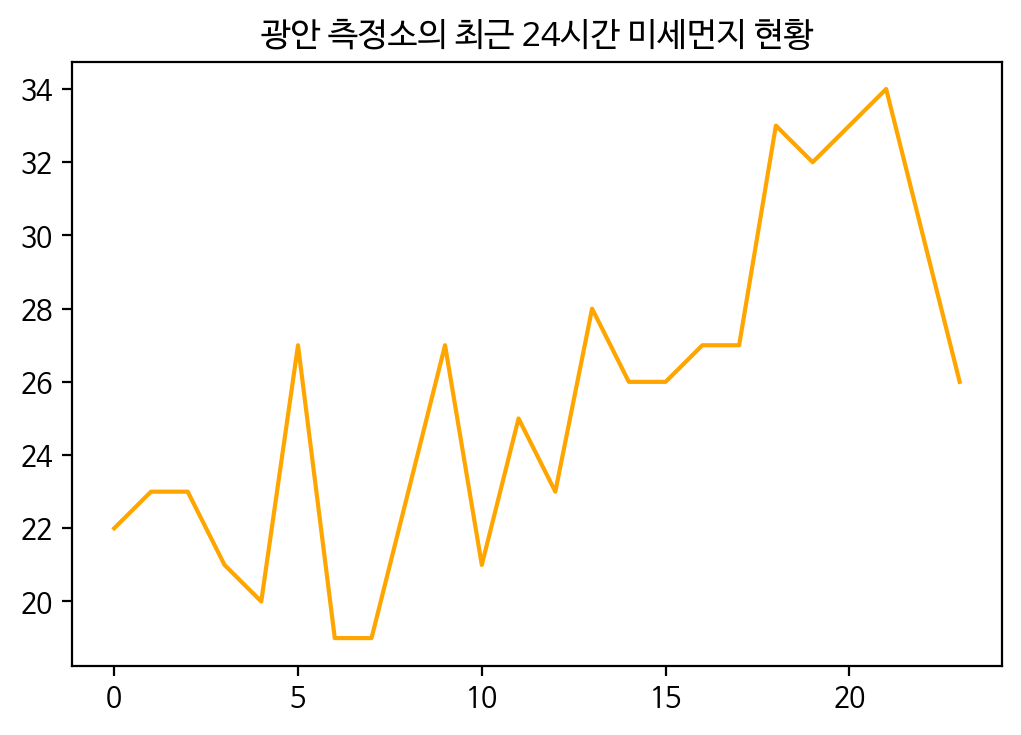

In [16]:
import csv
data = csv.reader(open('busan.csv'))
x=[]

print('부산의 24시간 미세먼지 현황입니다.')
print('측정소 명칭은 광복, 장림, 학장, 덕천, 연산, 대연, 청룡, 전포, 태종, 기장, 대저, 부곡, 광안, 명장, 녹산, 용수, 좌동, 수정, 대신, 덕포, 당리, 개금, 청학, 재송, 화명, 온천, 초량, 명지, 회동, 용호, 삼락 입니다.')
local = input('알아보고 싶은 측정소의 명칭을 입력해주세요 : ')

for row in data :
  if local in row[0] :
    for i in range(1, 25) :
      x.append(int(row[i]))
    break

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(dpi=200)
plt.plot(x, color = 'orange')
plt.title(local+' 측정소의 최근 24시간 미세먼지 현황')
plt.show

미세먼지 현황을 해 보니, 초미세먼지 현황과 같이 나타낼 수 있겠다 싶어 하나 더 만들었습니다.

부산의 24시간 미세먼지 현황입니다.
측정소 명칭은 광복, 장림, 학장, 덕천, 연산, 대연, 청룡, 전포, 태종, 기장, 대저, 부곡, 광안, 명장, 녹산, 용수, 좌동, 수정, 대신, 덕포, 당리, 개금, 청학, 재송, 화명, 온천, 초량, 명지, 회동, 용호, 삼락 입니다.
알아보고 싶은 측정소의 명칭을 입력해주세요 : 광안


<function matplotlib.pyplot.show(*args, **kw)>

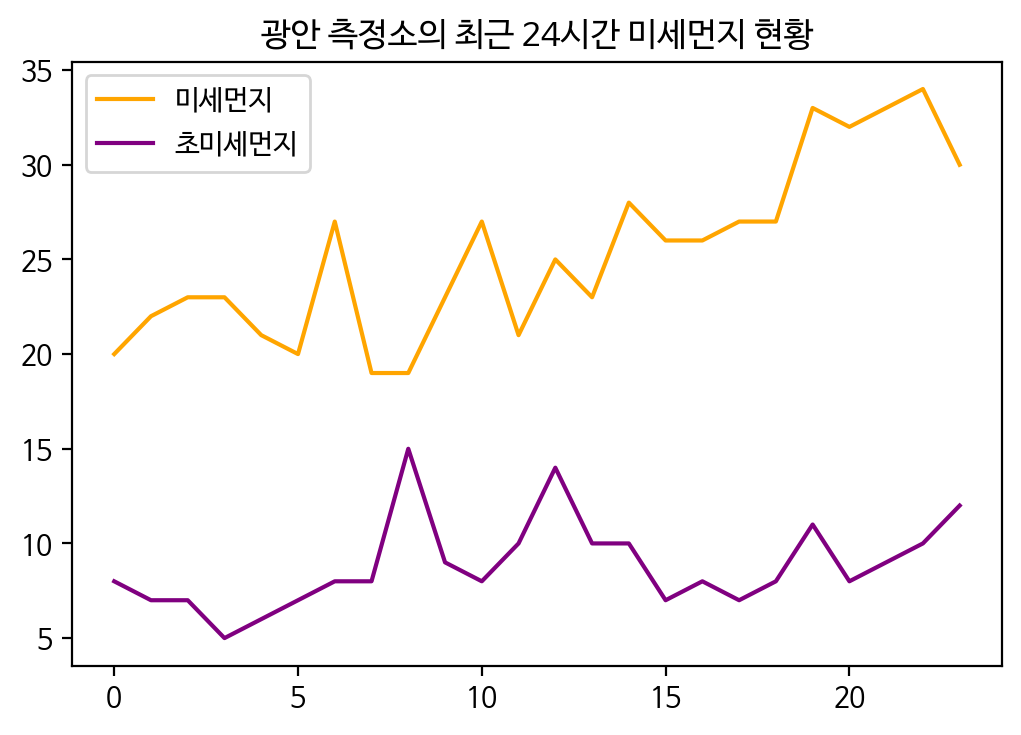

In [23]:
import csv
data1 = csv.reader(open('busan1.csv'))
data2 = csv.reader(open('busan2.csv'))

x1=[]
x2=[]

print('부산의 24시간 미세먼지 현황입니다.')
print('측정소 명칭은 광복, 장림, 학장, 덕천, 연산, 대연, 청룡, 전포, 태종, 기장, 대저, 부곡, 광안, 명장, 녹산, 용수, 좌동, 수정, 대신, 덕포, 당리, 개금, 청학, 재송, 화명, 온천, 초량, 명지, 회동, 용호, 삼락 입니다.')
local = input('알아보고 싶은 측정소의 명칭을 입력해주세요 : ')

for row in data1 :
  if local in row[0] :
    for i in range(1, 25) :
      x1.append(int(row[i]))
    break

for row in data2 :
  if local in row[0] :
    for i in range(1, 25) :
      x2.append(int(row[i]))
    break

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(dpi=200)
plt.title(local+' 측정소의 최근 24시간 미세먼지 현황')
plt.plot(x1, color = 'orange', label = '미세먼지')
plt.plot(x2, color = 'purple', label = '초미세먼지')
plt.legend()
plt.show